In [33]:
import os
import numpy as np
import pandas as pd
import csv
from sklearn import svm
from scipy.stats import uniform, norm
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

In [14]:
x_train = np.empty((0,5))
y_train = np.array([])

with open("Toy Dataset.csv","r") as f:
    d_reader = csv.reader(f,delimiter=",",quotechar="\"")
    first = True
    
    for line in d_reader:
        if first:
            first = False
            continue
        x_train = np.append(x_train,np.array(list(map(int,line[2:7]))).reshape((1,5)),axis=0)
        y_train = np.append(y_train,int(line[8]))
print(x_train.shape)
print(y_train.shape)
# print(y_train)

(419, 5)
(419,)


In [31]:
# SVM, Grid Search
parameters = {'C': np.logspace(-3, 2, 6), 'gamma': np.logspace(-3, 2, 6), 'kernel':['linear', 'rbf', 'sigmoid', 'poly'], 'shrinking':[True, False], 'probability':[True, False]}

svmc = svm.SVC()
grid_search_svm = GridSearchCV(svmc, parameters,cv=10)
grid_search_svm.fit(x_train,y_train)
print("Best Score: {:.4f}".format(grid_search_svm.best_score_))
for k,v in grid_search_svm.best_params_.items():
    print("{} => {}".format(k,v))
print("Splits: {}".format(grid_search_svm.n_splits_))
y_out = grid_search_svm.predict(x_train)
print("Accuracy: {:.4f}%".format(np.mean(y_out == y_train) * 100.0))
# print(y_out)

Best Score: 0.3462
C => 0.1
gamma => 0.001
kernel => linear
probability => True
shrinking => True
Splits: 10
Accuracy: 34.6062%


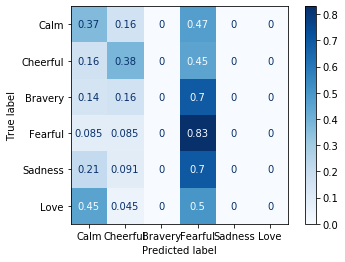

In [34]:
disp = plot_confusion_matrix(grid_search_svm, x_train, y_train,
                             display_labels=["Calm","Cheerful","Bravery","Fearful","Sadness","Love"],
                             cmap=plt.cm.Blues,
                             normalize='true')

In [37]:
# NuSVM, Grid Search
parameters = {'nu':list(np.arange(0.1, 0.9, 0.1)), 'gamma': np.logspace(-3, 2, 6), 'kernel':['linear', 'rbf', 'sigmoid', 'poly'], 'shrinking':[True, False], 'probability':[True, False]}

nusvm = svm.NuSVC()
grid_search_nu = GridSearchCV(nusvm, parameters,cv=10)
grid_search_nu.fit(x_train,y_train)
print("Best Score: {:.4f}".format(grid_search_nu.best_score_))
for k,v in grid_search_nu.best_params_.items():
    print("{} => {}".format(k,v))
print("Splits: {}".format(grid_search_nu.n_splits_))
y_out = grid_search_nu.predict(x_train)
print("Accuracy: {:.4f}%".format(np.mean(y_out == y_train) * 100.0))
# print(y_out)

C:\Users\Ashen One\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: specified nu is infeasible

  FitFailedWarning)
C:\Users\Ashen One\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: specified nu is infeasible

  FitFailedWarning)
C:\Users\Ashen One\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: specified nu is infeasible

  FitFailedWarning)
C:\Users\Ashen One\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-te

Best Score: 0.2312
gamma => 1.0
kernel => poly
nu => 0.4
probability => True
shrinking => True
Splits: 10
Accuracy: 23.8663%


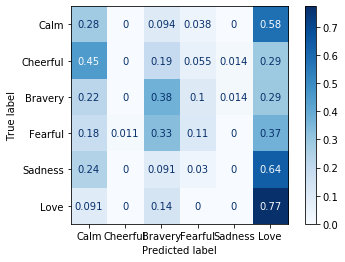

In [38]:
disp = plot_confusion_matrix(grid_search_nu, x_train, y_train,
                             display_labels=["Calm","Cheerful","Bravery","Fearful","Sadness","Love"],
                             cmap=plt.cm.Blues,
                             normalize='true')

In [39]:
# LinearSVM, Grid Search
parameters = {'penalty':['l1', 'l2'], 'loss':['hinge', 'squared_hinge'], 'dual':[True, False], 'C': np.logspace(-3, 2, 6), 'multi_class':['ovr', 'crammer_singer'], 
              'max_iter':[1000, 2500, 3000]}

linearsvm = svm.LinearSVC()
grid_search_linear = GridSearchCV(linearsvm, parameters,cv=10)
grid_search_linear.fit(x_train,y_train)
print("Best Score: {:.4f}".format(grid_search_linear.best_score_))
for k,v in grid_search_linear.best_params_.items():
    print("{} => {}".format(k,v))
print("Splits: {}".format(grid_search_linear.n_splits_))
y_out = grid_search_linear.predict(x_train)
print("Accuracy: {:.4f}%".format(np.mean(y_out == y_train) * 100.0))
# print(y_out)

C:\Users\Ashen One\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unsupported set of arguments: The combination of penalty='l1' and loss='hinge' is not supported, Parameters: penalty='l1', loss='hinge', dual=True

  FitFailedWarning)
C:\Users\Ashen One\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unsupported set of arguments: The combination of penalty='l1' and loss='hinge' is not supported, Parameters: penalty='l1', loss='hinge', dual=True

  FitFailedWarning)
C:\Users\Ashen One\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be

Best Score: 0.3415
C => 0.1
dual => False
loss => squared_hinge
max_iter => 1000
multi_class => ovr
penalty => l1
Splits: 10
Accuracy: 34.6062%


C:\Users\Ashen One\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


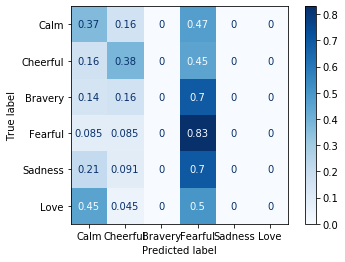

In [40]:
disp = plot_confusion_matrix(grid_search_linear, x_train, y_train,
                             display_labels=["Calm","Cheerful","Bravery","Fearful","Sadness","Love"],
                             cmap=plt.cm.Blues,
                             normalize='true')